In [11]:
library("caret")
library("e1071")
library("ROCit")
library("Metrics")


In [12]:
credito <- read.csv("../data/credit3.csv", sep = ";")

credito$class <- as.factor(credito$class)

head(credito)


,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,1
2,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,0
3,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,1
4,4,<0,existing paid,42,7882,2,4,45,1,2,1
5,5,<0,delayed previously,24,4870,3,4,53,2,2,0
6,6,no checking,existing paid,36,9055,2,4,35,1,2,1


In [13]:
credito <- credito[, -1]

head(credito)


,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,<0,critical/other existing credit,6,1169,4,4,67,2,1,1
2,0<=X<200,existing paid,48,5951,2,2,22,1,1,0
3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,1
4,<0,existing paid,42,7882,2,4,45,1,2,1
5,<0,delayed previously,24,4870,3,4,53,2,2,0
6,no checking,existing paid,36,9055,2,4,35,1,2,1


In [14]:
# Seed para reprodução dos resultados
set.seed(1234)

# Dividindo a base de dados em treino e teste
amostra <- sample(2, 100, replace = TRUE, prob = c(0.7, 0.3))

treino <- credito[amostra == 1, ]
teste <- credito[amostra == 2, ]


In [15]:
modelo <- svm(class ~ ., data = treino)

modelo



Call:
svm(formula = class ~ ., data = treino)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  470


In [16]:
previsao <- predict(modelo, teste)


In [17]:
resultado <- confusionMatrix(previsao, teste$class, positive = "1", mode = "everything")

resultado


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  21   4
         1  54 141
                                          
               Accuracy : 0.7364          
                 95% CI : (0.6729, 0.7933)
    No Information Rate : 0.6591          
    P-Value [Acc > NIR] : 0.008488        
                                          
                  Kappa : 0.3008          
                                          
 Mcnemar's Test P-Value : 1.243e-10       
                                          
            Sensitivity : 0.9724          
            Specificity : 0.2800          
         Pos Pred Value : 0.7231          
         Neg Pred Value : 0.8400          
              Precision : 0.7231          
                 Recall : 0.9724          
                     F1 : 0.8294          
             Prevalence : 0.6591          
         Detection Rate : 0.6409          
   Detection Prevalence : 0.8864          
      Balanced Accuracy : 0.62

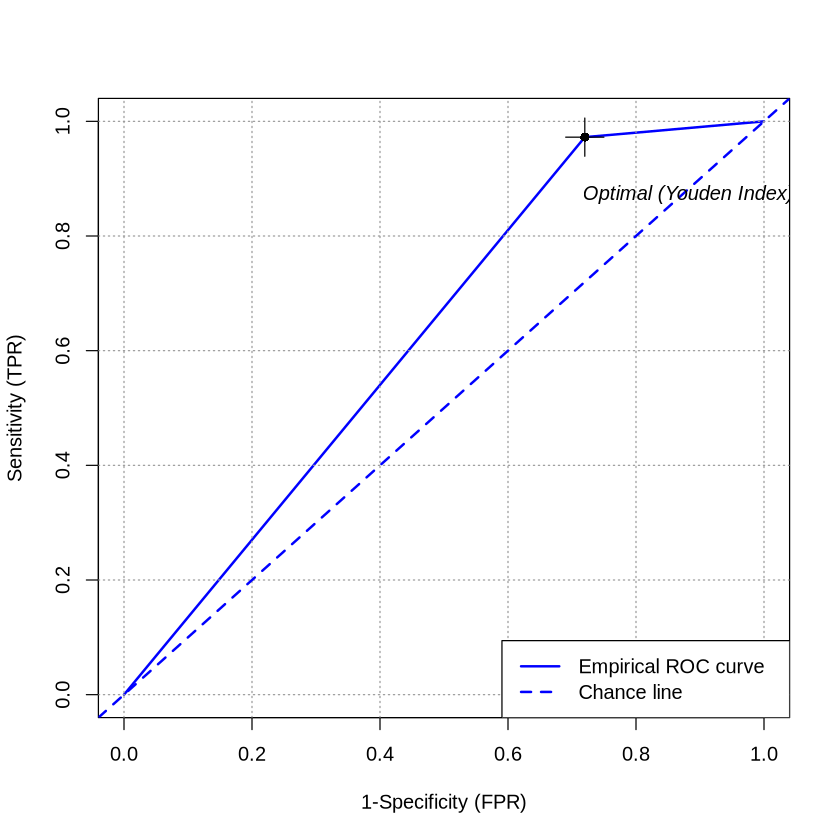

In [20]:
objectroc <- rocit(as.numeric(levels(previsao)[previsao]), as.numeric(levels(teste$class)[teste$class]))

plot(objectroc, col = "blue")
